**Target:**

- Added one more layer in end to increase model receptive field. This should increase model scores.

**Results:**

- Parameters: 7.7k
- Best Training Accuracy: 98.76
- Best Test Accuracy: 98.69

**Analysis:**

- Model performance increased but by a very marginal amount.
- Even if the model is pushed further, it won't be able to get to desired target of 99.4.
- Will add batch norm to increase model efficiency.

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets
from torchsummary import summary
import matplotlib.pyplot as plt
from models import Net4
from utils import train, test

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net4().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
            Conv2d-3           [-1, 16, 24, 24]           1,152
              ReLU-4           [-1, 16, 24, 24]               0
            Conv2d-5            [-1, 8, 24, 24]             128
         MaxPool2d-6            [-1, 8, 12, 12]               0
            Conv2d-7           [-1, 12, 10, 10]             864
              ReLU-8           [-1, 12, 10, 10]               0
            Conv2d-9             [-1, 12, 8, 8]           1,296
             ReLU-10             [-1, 12, 8, 8]               0
           Conv2d-11             [-1, 16, 6, 6]           1,728
             ReLU-12             [-1, 16, 6, 6]               0
           Conv2d-13             [-1, 16, 4, 4]           2,304
             ReLU-14             [-1, 1

In [3]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,)),
                                ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


In [4]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [5]:
model = Net4().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_losses, train_acc = train(model, device, train_loader, optimizer, criterion, train_losses, train_acc)
    test_losses, test_acc = test(model, device, test_loader, criterion, test_losses, test_acc)

Epoch 1


Train: Loss=2.3010 Batch_id=468 Accuracy=9.94: 100%|██████████| 469/469 [00:19<00:00, 23.81it/s]


Test set: Average loss: 2.2997, Accuracy: 1009/10000 (10.09%)

Epoch 2


Train: Loss=0.1692 Batch_id=468 Accuracy=59.62: 100%|██████████| 469/469 [00:20<00:00, 23.07it/s]


Test set: Average loss: 0.2418, Accuracy: 9248/10000 (92.48%)

Epoch 3


Train: Loss=0.0854 Batch_id=468 Accuracy=94.26: 100%|██████████| 469/469 [00:19<00:00, 24.56it/s]


Test set: Average loss: 0.1447, Accuracy: 9541/10000 (95.41%)

Epoch 4


Train: Loss=0.1446 Batch_id=468 Accuracy=96.17: 100%|██████████| 469/469 [00:18<00:00, 24.85it/s]


Test set: Average loss: 0.0982, Accuracy: 9697/10000 (96.97%)

Epoch 5


Train: Loss=0.0625 Batch_id=468 Accuracy=97.02: 100%|██████████| 469/469 [00:19<00:00, 24.59it/s]


Test set: Average loss: 0.0770, Accuracy: 9758/10000 (97.58%)

Epoch 6


Train: Loss=0.0576 Batch_id=468 Accuracy=97.51: 100%|██████████| 469/469 [00:19<00:00, 24.16it/s]


Test set: Average loss: 0.0743, Accuracy: 9780/10000 (97.80%)

Epoch 7


Train: Loss=0.0321 Batch_id=468 Accuracy=97.90: 100%|██████████| 469/469 [00:18<00:00, 25.13it/s]


Test set: Average loss: 0.0611, Accuracy: 9808/10000 (98.08%)

Epoch 8


Train: Loss=0.0691 Batch_id=468 Accuracy=98.08: 100%|██████████| 469/469 [00:18<00:00, 25.26it/s]


Test set: Average loss: 0.0530, Accuracy: 9831/10000 (98.31%)

Epoch 9


Train: Loss=0.0506 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:19<00:00, 23.98it/s]


Test set: Average loss: 0.0847, Accuracy: 9723/10000 (97.23%)

Epoch 10


Train: Loss=0.0246 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:19<00:00, 24.37it/s]


Test set: Average loss: 0.0647, Accuracy: 9792/10000 (97.92%)

Epoch 11


Train: Loss=0.0376 Batch_id=468 Accuracy=98.44: 100%|██████████| 469/469 [00:18<00:00, 25.37it/s]


Test set: Average loss: 0.0448, Accuracy: 9856/10000 (98.56%)

Epoch 12


Train: Loss=0.0092 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:18<00:00, 24.89it/s]


Test set: Average loss: 0.0539, Accuracy: 9835/10000 (98.35%)

Epoch 13


Train: Loss=0.0203 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:19<00:00, 24.34it/s]


Test set: Average loss: 0.0424, Accuracy: 9869/10000 (98.69%)

Epoch 14


Train: Loss=0.2318 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:18<00:00, 24.97it/s]


Test set: Average loss: 0.0433, Accuracy: 9854/10000 (98.54%)

Epoch 15


Train: Loss=0.1257 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:18<00:00, 25.28it/s]


Test set: Average loss: 0.0440, Accuracy: 9861/10000 (98.61%)



Text(0.5, 1.0, 'Test Accuracy')

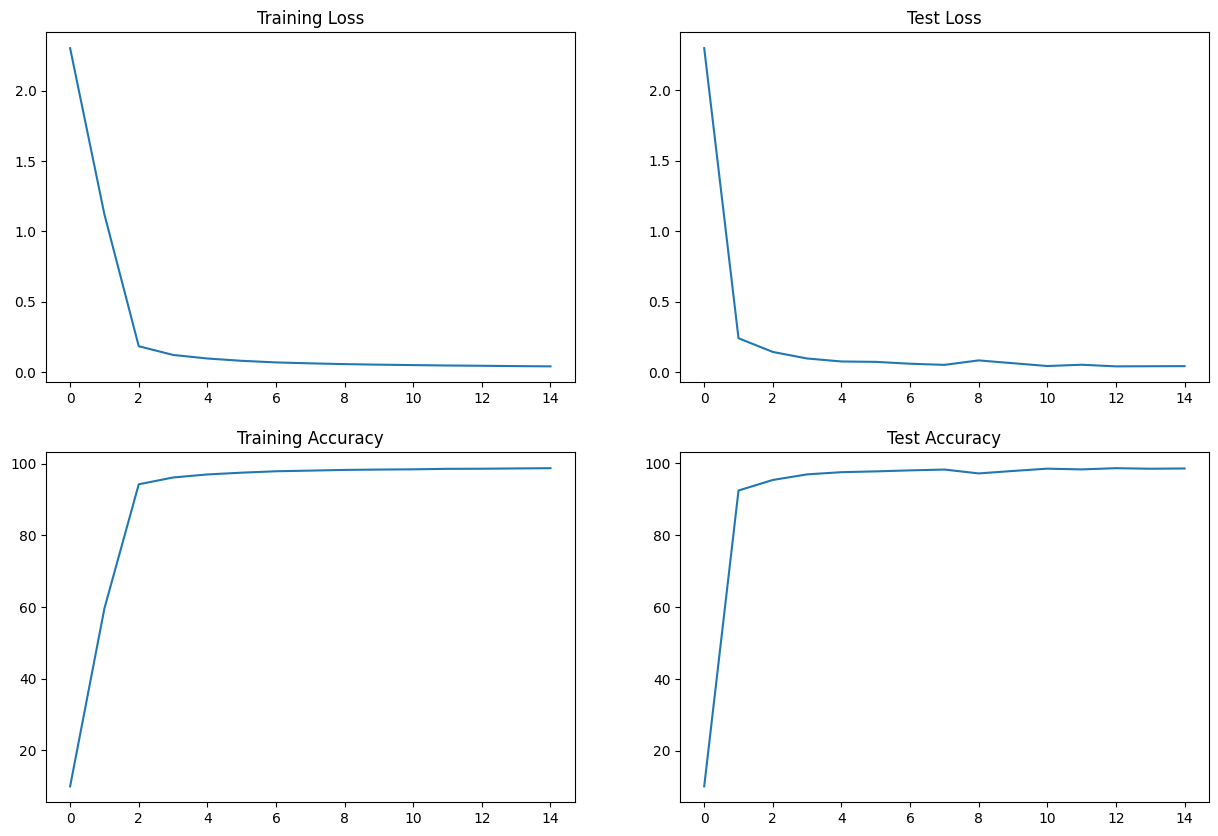

In [6]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [7]:
print("best train accuracy : ", max(train_acc))
print("best test accuracy : ", max(test_acc))

best train accuracy :  98.76
best test accuracy :  98.69


In [8]:
print("best train loss : ", min(train_losses))
print("best test loss : ", min(test_losses))

best train loss :  0.041140966603893846
best test loss :  0.04237993929386139
